<a href="https://colab.research.google.com/github/Siddharth-Singh-2004/CU-BEMS_Floor1_2018/blob/main/CU_BEMS_Floor1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import pandas as pd
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
old_df=pd.read_csv('/content/drive/MyDrive/2018Floor1.csv')

In [4]:
old_df.head()

,Date,z1_Light(kW),z1_Plug(kW),z2_AC1(kW),z2_AC2(kW),z2_AC3(kW),z2_AC4(kW),z2_Light(kW),z2_Plug(kW),z3_Light(kW),z3_Plug(kW),z4_Light(kW)
0,2018-07-01 00:00:00,12.94,18.56,45.24,0.01,0.01,0.00,13.76,17.64,10.92,0.89,35.76
1,2018-07-01 00:01:00,12.97,18.55,45.28,0.02,0.01,0.01,13.76,17.21,10.95,0.87,35.81
2,2018-07-01 00:02:00,12.97,18.55,45.24,0.01,0.01,0.01,13.79,17.18,10.94,0.86,35.78
3,2018-07-01 00:03:00,12.98,18.58,45.26,0.02,0.01,0.00,13.81,16.64,10.94,0.85,35.83
4,2018-07-01 00:04:00,13.01,18.60,45.22,0.02,0.01,0.01,13.83,15.69,10.97,0.85,35.86


In [5]:
old_df.tail()

,Date,z1_Light(kW),z1_Plug(kW),z2_AC1(kW),z2_AC2(kW),z2_AC3(kW),z2_AC4(kW),z2_Light(kW),z2_Plug(kW),z3_Light(kW),z3_Plug(kW),z4_Light(kW)
264955,2018-12-31 23:55:00,0.01,0.57,49.30,1.37,0.01,0.01,18.03,14.09,10.21,0.37,14.58
264956,2018-12-31 23:56:00,0.01,0.57,45.44,1.36,0.01,0.00,17.72,11.37,10.13,0.38,14.60
264957,2018-12-31 23:57:00,0.01,0.58,2.31,1.36,0.01,0.01,17.48,11.35,10.07,0.38,14.57
264958,2018-12-31 23:58:00,0.02,0.57,2.31,1.35,0.00,0.00,17.43,11.39,9.99,0.37,14.59
264959,2018-12-31 23:59:00,0.00,0.56,2.31,1.36,0.01,0.01,17.42,11.38,10.05,0.38,14.59


In [6]:
old_df['Date'] = pd.to_datetime(old_df['Date'])

In [7]:
old_df_filled = old_df.fillna(0)

In [8]:
grouped_df = old_df_filled.groupby('Date').sum()
grouped_df['total_power'] = grouped_df.sum(axis=1)

In [9]:
grouped_df.head()

,z1_Light(kW),z1_Plug(kW),z2_AC1(kW),z2_AC2(kW),z2_AC3(kW),z2_AC4(kW),z2_Light(kW),z2_Plug(kW),z3_Light(kW),z3_Plug(kW),z4_Light(kW),total_power
Date,,,,,,,,,,,,
2018-07-01 00:00:00,12.94,18.56,45.24,0.01,0.01,0.00,13.76,17.64,10.92,0.89,35.76,155.73
2018-07-01 00:01:00,12.97,18.55,45.28,0.02,0.01,0.01,13.76,17.21,10.95,0.87,35.81,155.44
2018-07-01 00:02:00,12.97,18.55,45.24,0.01,0.01,0.01,13.79,17.18,10.94,0.86,35.78,155.34
2018-07-01 00:03:00,12.98,18.58,45.26,0.02,0.01,0.00,13.81,16.64,10.94,0.85,35.83,154.92
2018-07-01 00:04:00,13.01,18.60,45.22,0.02,0.01,0.01,13.83,15.69,10.97,0.85,35.86,154.07


In [10]:
df = grouped_df[['total_power']].reset_index()

In [11]:
df.head()

,Date,total_power
0,2018-07-01 00:00:00,155.73
1,2018-07-01 00:01:00,155.44
2,2018-07-01 00:02:00,155.34
3,2018-07-01 00:03:00,154.92
4,2018-07-01 00:04:00,154.07


In [12]:
df.tail()

,Date,total_power
264955,2018-12-31 23:55:00,108.55
264956,2018-12-31 23:56:00,101.59
264957,2018-12-31 23:57:00,58.13
264958,2018-12-31 23:58:00,58.02
264959,2018-12-31 23:59:00,58.07


In [13]:
df['total_power'] = df['total_power'].astype(float)

In [14]:
# Normalizing
data_max = df['total_power'].max()
data_min = df['total_power'].min()
df['total_power'] = (df['total_power'] - data_min) / (data_max - data_min)

In [15]:
df.head()

,Date,total_power
0,2018-07-01 00:00:00,0.032482
1,2018-07-01 00:01:00,0.032422
2,2018-07-01 00:02:00,0.032401
3,2018-07-01 00:03:00,0.032313
4,2018-07-01 00:04:00,0.032136


In [16]:
# Custom Dataset
class TimeSeriesDataset(Dataset):

  def __init__(self, data, sequence_length):
    self.data = data
    self.sequence_length = sequence_length

  def __len__(self):
    return len(self.data) - self.sequence_length

  def __getitem__(self, idx):
    x = self.data[idx:idx+self.sequence_length]
    y = self.data[idx+self.sequence_length]
    return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)



In [17]:
# Standard values
number_of_minutes_in_an_hour = 60
number_of_minutes_in_a_day = 24 * number_of_minutes_in_an_hour

In [18]:
window_size = 6
train_size = window_size * number_of_minutes_in_a_day
test_size = number_of_minutes_in_a_day

In [19]:
dataslice = df['total_power'][-train_size - test_size:]
dataset = TimeSeriesDataset(dataslice.values, sequence_length = number_of_minutes_in_an_hour)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

In [20]:
for batch_idx, (x, y) in enumerate(dataloader):
  print(f"Batch {batch_idx+1}:")
  print(f"x: {x}")
  print(f"y: {y}")

Streaming output truncated to the last 5000 lines.
         0.0366, 0.0365, 0.0359, 0.0351, 0.0351, 0.0350, 0.0351, 0.0351, 0.0363,
         0.0363, 0.0363, 0.0363, 0.0362, 0.0361, 0.0361, 0.0358, 0.0347, 0.0347,
         0.0347, 0.0347, 0.0348, 0.0363, 0.0363, 0.0362, 0.0362, 0.0362, 0.0350,
         0.0329, 0.0312, 0.0300, 0.0300, 0.0300, 0.0301, 0.0303, 0.0317, 0.0317,
         0.0317, 0.0317, 0.0316, 0.0315, 0.0315, 0.0311, 0.0300, 0.0300, 0.0301,
         0.0302, 0.0303, 0.0317, 0.0317, 0.0316, 0.0317],
        [0.0285, 0.0284, 0.0284, 0.0283, 0.0245, 0.0191, 0.0183, 0.0177, 0.0177,
         0.0221, 0.0274, 0.0278, 0.0285, 0.0285, 0.0285, 0.0286, 0.0285, 0.0283,
         0.0282, 0.0250, 0.0177, 0.0177, 0.0177, 0.0177, 0.0222, 0.0292, 0.0288,
         0.0287, 0.0286, 0.0287, 0.0286, 0.0284, 0.0283, 0.0272, 0.0269, 0.0269,
         0.0242, 0.0177, 0.0188, 0.0194, 0.0193, 0.0258, 0.0290, 0.0287, 0.0285,
         0.0284, 0.0281, 0.0270, 0.0178, 0.0178, 0.0178, 0.0180, 0.0260, 0.0291,


In [21]:
# Transformer model
class TimeSeriesTransformer(nn.Module):

  def __init__(self, input_size, d_model, n_heads, num_layers):
    super(TimeSeriesTransformer, self).__init__()
    self.embedding = nn.Linear(input_size, d_model)
    self.positional_embedding = nn.Parameter(torch.zeros(70, d_model))
    self.transformer = nn.Transformer(d_model, n_heads, num_layers)
    self.fc_out = nn.Linear(d_model, 1)

  def forward(self, src):
    src = src.unsqueeze(-1)
    src = self.embedding(src)
    src = src + self.positional_embedding[:src.size(1), :]
    src = src.permute(1, 0, 2)
    transformer_output = self.transformer(src, src)
    transformer_output = transformer_output.permute(1, 0, 2)
    output = self.fc_out(transformer_output)
    return output[:, -1, :]



In [22]:
def compute_r2(y_true, y_pred):
    y_true = y_true.detach().numpy()
    y_pred = y_pred.detach().numpy()
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r2_score = 1 - (ss_res / ss_tot)
    return r2_score

In [23]:
input_size = 1
d_model = 64
n_heads = 8
num_layers = 2
sequence_length = number_of_minutes_in_an_hour
model = TimeSeriesTransformer(input_size, d_model, n_heads, num_layers)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [24]:
# Training loop
epochs = 100
for epoch in range(epochs):
  epoch_loss = 0.0
  epoch_r2 = 0.0
  for x, y in dataloader:
    optimizer.zero_grad()
    y = y.unsqueeze(-1)
    output = model(x)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    epoch_loss += loss.item()

    r2 = compute_r2(y, output)
    epoch_r2 += r2

  epoch_loss /= len(dataloader)
  epoch_r2 /= len(dataloader)

  print(f'Epoch {epoch+1}, Loss: {epoch_loss:.4f}, R²: {epoch_r2:.4f}')

Epoch 1, Loss: 0.0136, R²: -180.0869
Epoch 2, Loss: 0.0002, R²: -1.4706
Epoch 3, Loss: 0.0001, R²: -1.0116
Epoch 4, Loss: 0.0001, R²: -0.8429
Epoch 5, Loss: 0.0001, R²: -0.7835
Epoch 6, Loss: 0.0001, R²: -0.6327
Epoch 7, Loss: 0.0001, R²: -0.6182
Epoch 8, Loss: 0.0001, R²: -0.6772
Epoch 9, Loss: 0.0001, R²: -0.7818
Epoch 10, Loss: 0.0001, R²: -1.0283
Epoch 11, Loss: 0.0001, R²: -0.4707
Epoch 12, Loss: 0.0001, R²: -0.4298
Epoch 13, Loss: 0.0001, R²: -0.4068
Epoch 14, Loss: 0.0001, R²: -0.3823
Epoch 15, Loss: 0.0001, R²: -0.4722
Epoch 16, Loss: 0.0001, R²: -0.3720
Epoch 17, Loss: 0.0001, R²: -0.3405
Epoch 18, Loss: 0.0001, R²: -0.3139
Epoch 19, Loss: 0.0001, R²: -0.2879
Epoch 20, Loss: 0.0001, R²: -0.2569
Epoch 21, Loss: 0.0001, R²: -0.2440
Epoch 22, Loss: 0.0001, R²: -0.1938
Epoch 23, Loss: 0.0001, R²: -0.2114
Epoch 24, Loss: 0.0001, R²: -0.1955
Epoch 25, Loss: 0.0001, R²: -0.1890
Epoch 26, Loss: 0.0001, R²: -0.1950
Epoch 27, Loss: 0.0001, R²: -0.1769
Epoch 28, Loss: 0.0001, R²: -0.1981

KeyboardInterrupt: 

In [25]:
model.eval()
with torch.no_grad():
  last_sequence = torch.tensor(dataslice[-sequence_length:].values, dtype=torch.float32).unsqueeze(0)
  forecast_length = test_size
  forecasts = []

  for _ in range(forecast_length):
    normalized_forecast = model(last_sequence)
    forecast = normalized_forecast.item() * (data_max - data_min) + data_min
    forecasts.append(forecast)

    new_forecast = torch.tensor([normalized_forecast.item()], dtype=torch.float32).unsqueeze(0)
    last_sequence = torch.cat((last_sequence[:, 1:], new_forecast), dim=1)

  print(f'List of forecasts: {forecasts}')

List of forecasts: [108.00224666649476, 108.00225559663028, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 108.00224666649476, 

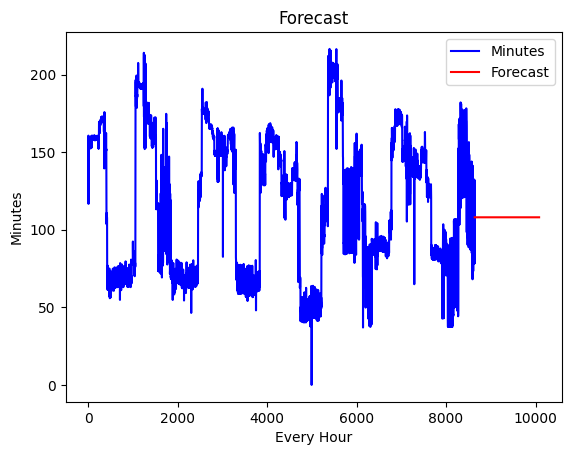

In [26]:
new_data = dataslice.values * (data_max - data_min) + data_min
all_data = np.concatenate([new_data[:train_size], forecasts])
x = np.arange(1, len(all_data) + 1)

split_point = len(all_data) - len(forecasts)

plt.plot(x[:split_point], all_data[:split_point], label='Minutes', color='blue')

plt.plot(x[split_point:], all_data[split_point:], label='Forecast', color='red')

plt.xlabel('Every Hour')
plt.ylabel('Minutes')
plt.title('Forecast')

plt.legend()

plt.show()

In [27]:
new_data = dataslice.values * (data_max - data_min) + data_min
mse = np.mean((new_data[-test_size:] - forecasts) ** 2)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 1501.4832588660172
